Данные: 11_automobiles
https://archive.ics.uci.edu/dataset/10/automobile

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 

Задача:

Классификация (случайный лес, градиентный бустинг, SVM).

Анализ важности признаков для выявления факторов, определяющих риск.

Кластеризация автомобилей на основе их характеристик.

Этот набор данных состоит из трех типов сущностей: (a) спецификация автомобиля с точки зрения различных характеристик, (b) присвоенный ему рейтинг страхового риска, (c) его нормализованные потери при использовании по сравнению с другими автомобилями. Второй рейтинг соответствует степени, в которой автомобиль более рискован, чем указывает его цена.Значение +3 указывает на то, что автомобиль является рискованным, -3 — что он, вероятно, довольно безопасен. Третий фактор — относительная средняя выплата убытков за застрахованный автомобиль в год. Это значение нормализовано для всех автомобилей в рамках определенной классификации размеров (двухдверный малый, универсал, спортивный/специализированный и т. д.) и представляет собой средний убыток на автомобиль в год.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = X.copy()
df["symboling"] = y["symboling"]  # Добавляем целевую переменную для анализа

In [6]:
df.head(3)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [8]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [9]:
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

Пропуски обнаружены в следующих столбцах:
- price (цена) – 4 пропущенных
- peak-rpm (макс. обороты двигателя) – 2 пропущенных
- horsepower (мощность) – 2 пропущенных
- stroke (ход поршня) – 4 пропущенных
- bore (диаметр цилиндра) – 4 пропущенных
- num-of-doors (количество дверей) – 2 пропущенных
- normalized-losses (нормализованные убытки) – 41 пропущенное.

Решение:
- num-of-doors имеет всего два возможных значения (2 или 4). Заполним медианой или наиболее частым значением.
- price, peak-rpm, horsepower, stroke, bore – медианой (чтобы избежать смещения данных).
- normalized-losses – возможны два варианта: 
        Заполнить медианой (если выбросов мало).
        Удалить столбец (если потери слишком велики).

C:\Users\mmd28\AppData\Local\Temp\ipykernel_4156\2670048208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["symboling"], palette="coolwarm")


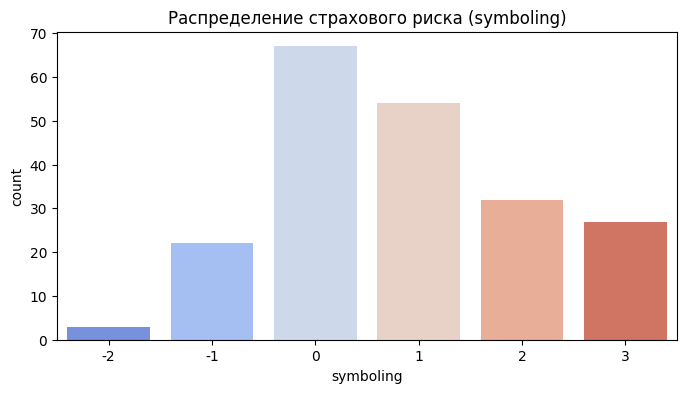

In [10]:
# 3. Распределение целевой переменной
plt.figure(figsize=(8, 4))
sns.countplot(x=df["symboling"], palette="coolwarm")
plt.title("Распределение страхового риска (symboling)")
plt.show()

Самые частые классы: 0, 1, 2.
Классы -2 и -1 встречаются реже, но баланс данных не критичен.

Преобразование категориальных переменных
Категориальные признаки: fuel-system, engine-type, engine-location, drive-wheels, body-style, aspiration, fuel-type, make.

num-of-doors – можно преобразовать в int.

Один из вариантов: кодирование One-Hot Encoding для моделей, которые не работают с текстом.

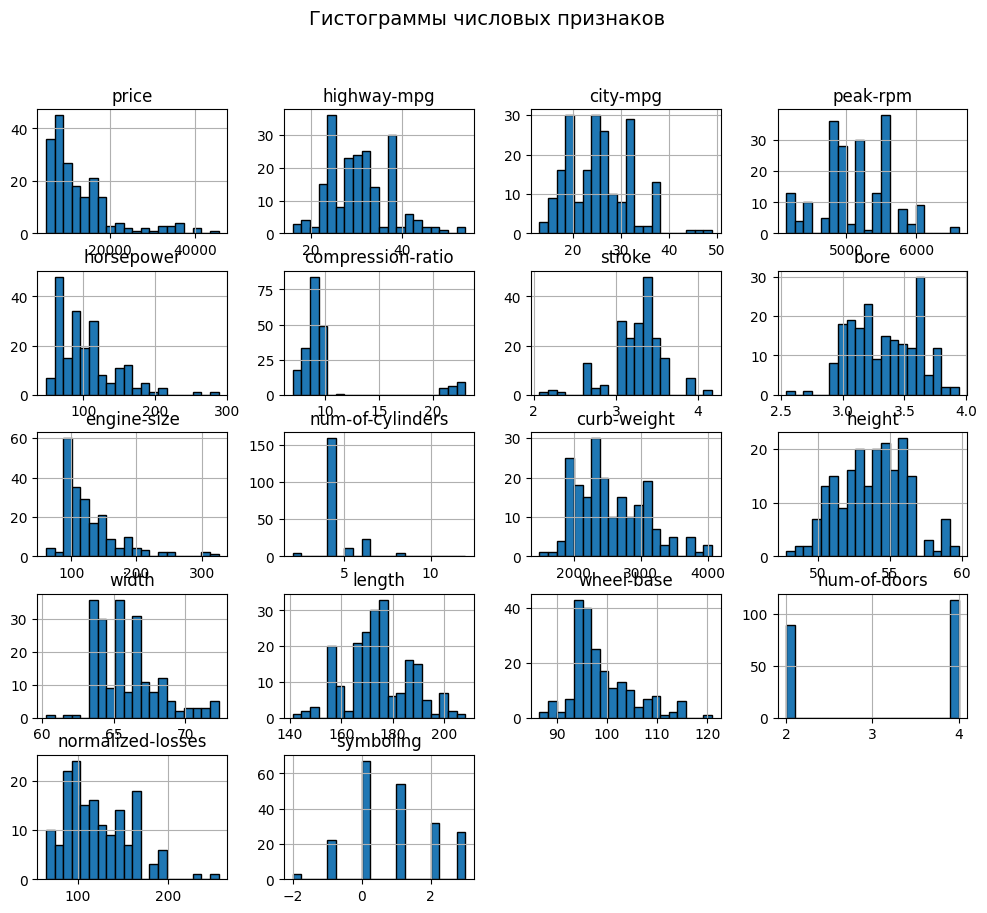

In [11]:
# 4. Распределение числовых признаков
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Гистограммы числовых признаков", fontsize=14)
plt.show()

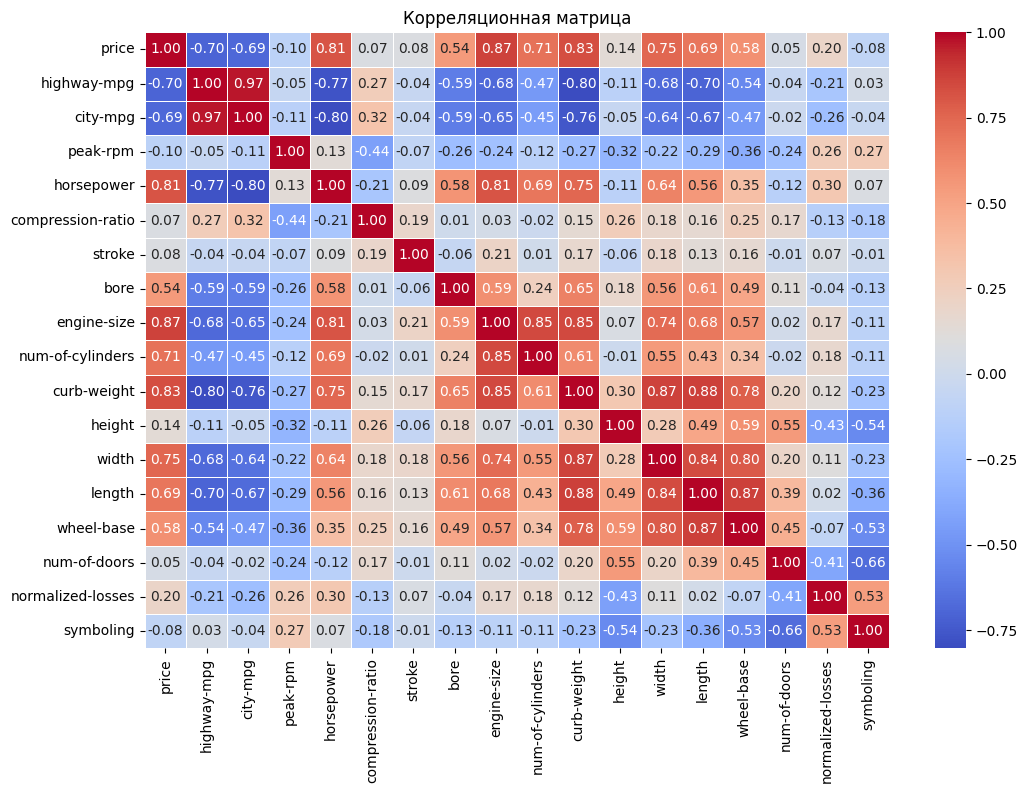

In [12]:
# 5. Корреляция числовых признаков
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

Факторы, сильно влияющие на цену (price):

Наибольшая положительная корреляция с размером двигателя (engine-size) (0.87), снаряженной массой (curb-weight) (0.83), мощностью (horsepower) (0.81) и числом цилиндров (num-of-cylinders) (0.71). Это логично, так как более мощные и тяжелые автомобили, как правило, дороже.

Отрицательная корреляция с расходом топлива (highway-mpg, city-mpg) (-0.70 и -0.69), что говорит о том, что более экономичные автомобили, как правило, дешевле.

Связь между характеристиками автомобиля:

Ширина (width), длина (length) и колесная база (wheel-base) сильно коррелируют между собой (от 0.79 до 0.87). Это естественно, так как чем больше автомобиль, тем он длиннее и шире.

Снаряженная масса (curb-weight) также имеет высокую корреляцию с размером двигателя (engine-size) (0.85) и мощностью (horsepower) (0.75), что подтверждает связь между весом и мощностью автомобиля.

Факторы, связанные с топливной экономичностью:

Городской и трассовый расход топлива (city-mpg, highway-mpg) имеют очень сильную положительную корреляцию (0.97), что логично.

Эти же параметры сильно отрицательно коррелируют с мощностью (horsepower) (-0.80) и размером двигателя (engine-size) (-0.65), подтверждая, что более мощные двигатели потребляют больше топлива.

Корреляция страхового риска (symboling):

Средняя отрицательная корреляция с размерами и массой автомобиля: длиной (-0.36), шириной (-0.23), весом (-0.22). Это может означать, что меньшие и более легкие машины имеют более высокий страховой риск.

Положительная корреляция с нормализованными убытками (normalized-losses) (0.53), что подтверждает связь между уровнем страхового риска и убытками страховых компаний.

Незначительная связь с ценой (price) (-0.08), что говорит о том, что страховой риск не сильно зависит от стоимости автомобиля.

C:\Users\mmd28\AppData\Local\Temp\ipykernel_4156\3685270490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["symboling"], y=df["price"], palette="coolwarm")


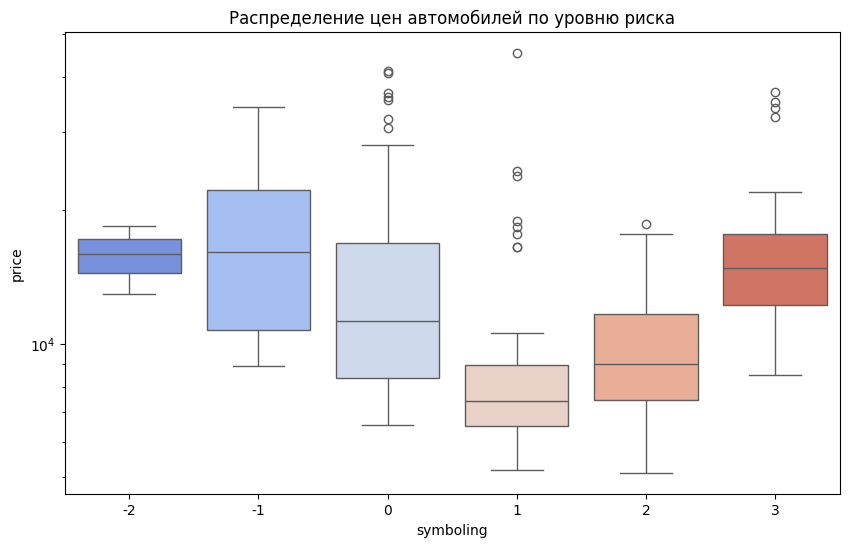

In [13]:
# 6. Взаимосвязь между ценой и страховым риском
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["symboling"], y=df["price"], palette="coolwarm")
plt.yscale("log")  # Логарифмическая шкала для удобства
plt.title("Распределение цен автомобилей по уровню риска")
plt.show()

C:\Users\mmd28\AppData\Local\Temp\ipykernel_4156\992184285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["symboling"], y=df["highway-mpg"], palette="coolwarm")


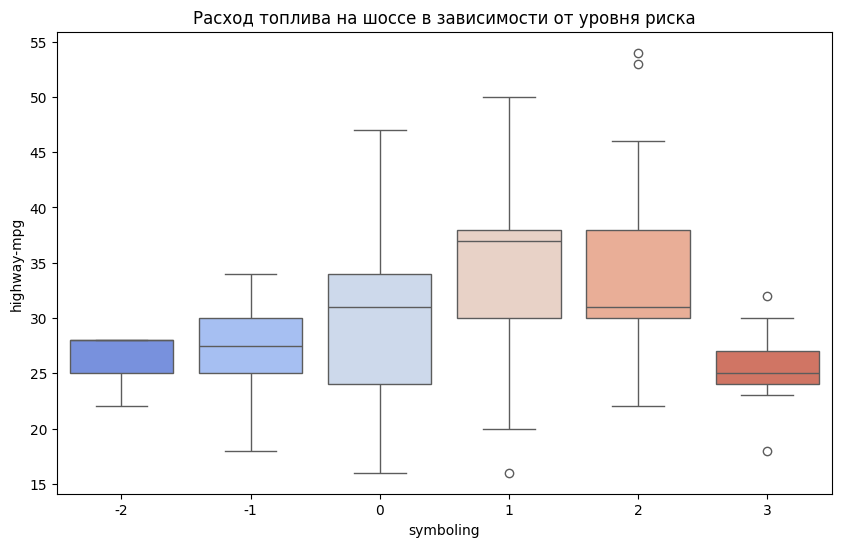

In [14]:
# 7. Взаимосвязь расхода топлива и риска
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["symboling"], y=df["highway-mpg"], palette="coolwarm")
plt.title("Расход топлива на шоссе в зависимости от уровня риска")
plt.show()

C:\Users\mmd28\AppData\Local\Temp\ipykernel_4156\3897165680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["symboling"], y=df["horsepower"], palette="coolwarm")


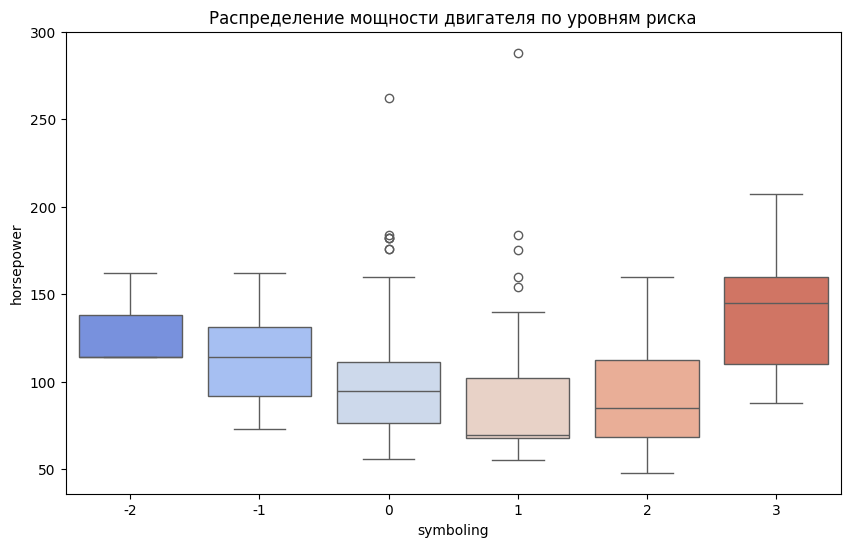

In [15]:
# 8. Взаимосвязь мощности и риска
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["symboling"], y=df["horsepower"], palette="coolwarm")
plt.title("Распределение мощности двигателя по уровням риска")
plt.show()

Выбросы наблюдаются по разным характеристикам (цена, мощность, расход топлива), но в основном в symboling = 1, 2, 3. Это может говорить о наличии как дешевых маломощных машин, так и дорогих спортивных моделей в этих категориях. Проверим данные.

In [16]:
# Функция для поиска выбросов с использованием метода межквартильного размаха (IQR)
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [17]:
# Найдем выбросы по highway-mpg, horsepower и price
outliers_highway_mpg = find_outliers(df, 'highway-mpg')
outliers_horsepower = find_outliers(df, 'horsepower')
outliers_price = find_outliers(df, 'price')

In [18]:
# Объединяем все выбросы в один DataFrame
outliers = pd.concat([outliers_highway_mpg, outliers_horsepower, outliers_price]).drop_duplicates()

In [19]:
# Фильтруем только строки, где symboling = 0, 1, 2, 3
outliers = outliers[outliers['symboling'].isin([0, 1, 2, 3])]

In [20]:
outliers

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
18,5151.0,53,47,5100.0,48.0,9.5,3.03,2.91,2bbl,61,...,88.4,front,fwd,hatchback,2.0,std,gas,chevrolet,121.0,2
30,6479.0,54,49,4800.0,58.0,9.6,3.41,2.91,1bbl,92,...,86.6,front,fwd,hatchback,2.0,std,gas,honda,137.0,2
90,7099.0,50,45,4800.0,55.0,21.9,3.47,2.99,idi,103,...,94.5,front,fwd,sedan,2.0,std,diesel,nissan,128.0,1
49,36000.0,17,13,5000.0,262.0,11.5,2.76,3.54,mpfi,326,...,102.0,front,rwd,sedan,2.0,std,gas,jaguar,NaN,0
105,19699.0,23,17,5200.0,200.0,7.8,3.27,3.43,mpfi,181,...,91.3,front,rwd,hatchback,2.0,turbo,gas,nissan,194.0,3
126,32528.0,25,17,5900.0,207.0,9.5,2.90,3.74,mpfi,194,...,89.5,rear,rwd,hardtop,2.0,std,gas,porsche,NaN,3
127,34028.0,25,17,5900.0,207.0,9.5,2.90,3.74,mpfi,194,...,89.5,rear,rwd,hardtop,2.0,std,gas,porsche,NaN,3
128,37028.0,25,17,5900.0,207.0,9.5,2.90,3.74,mpfi,194,...,89.5,rear,rwd,convertible,2.0,std,gas,porsche,NaN,3
129,NaN,28,17,5750.0,288.0,10.0,3.11,3.94,mpfi,203,...,98.4,front,rwd,hatchback,2.0,std,gas,porsche,NaN,1
15,30760.0,22,16,5400.0,182.0,8.0,3.39,3.62,mpfi,209,...,103.5,front,rwd,sedan,4.0,std,gas,bmw,NaN,0


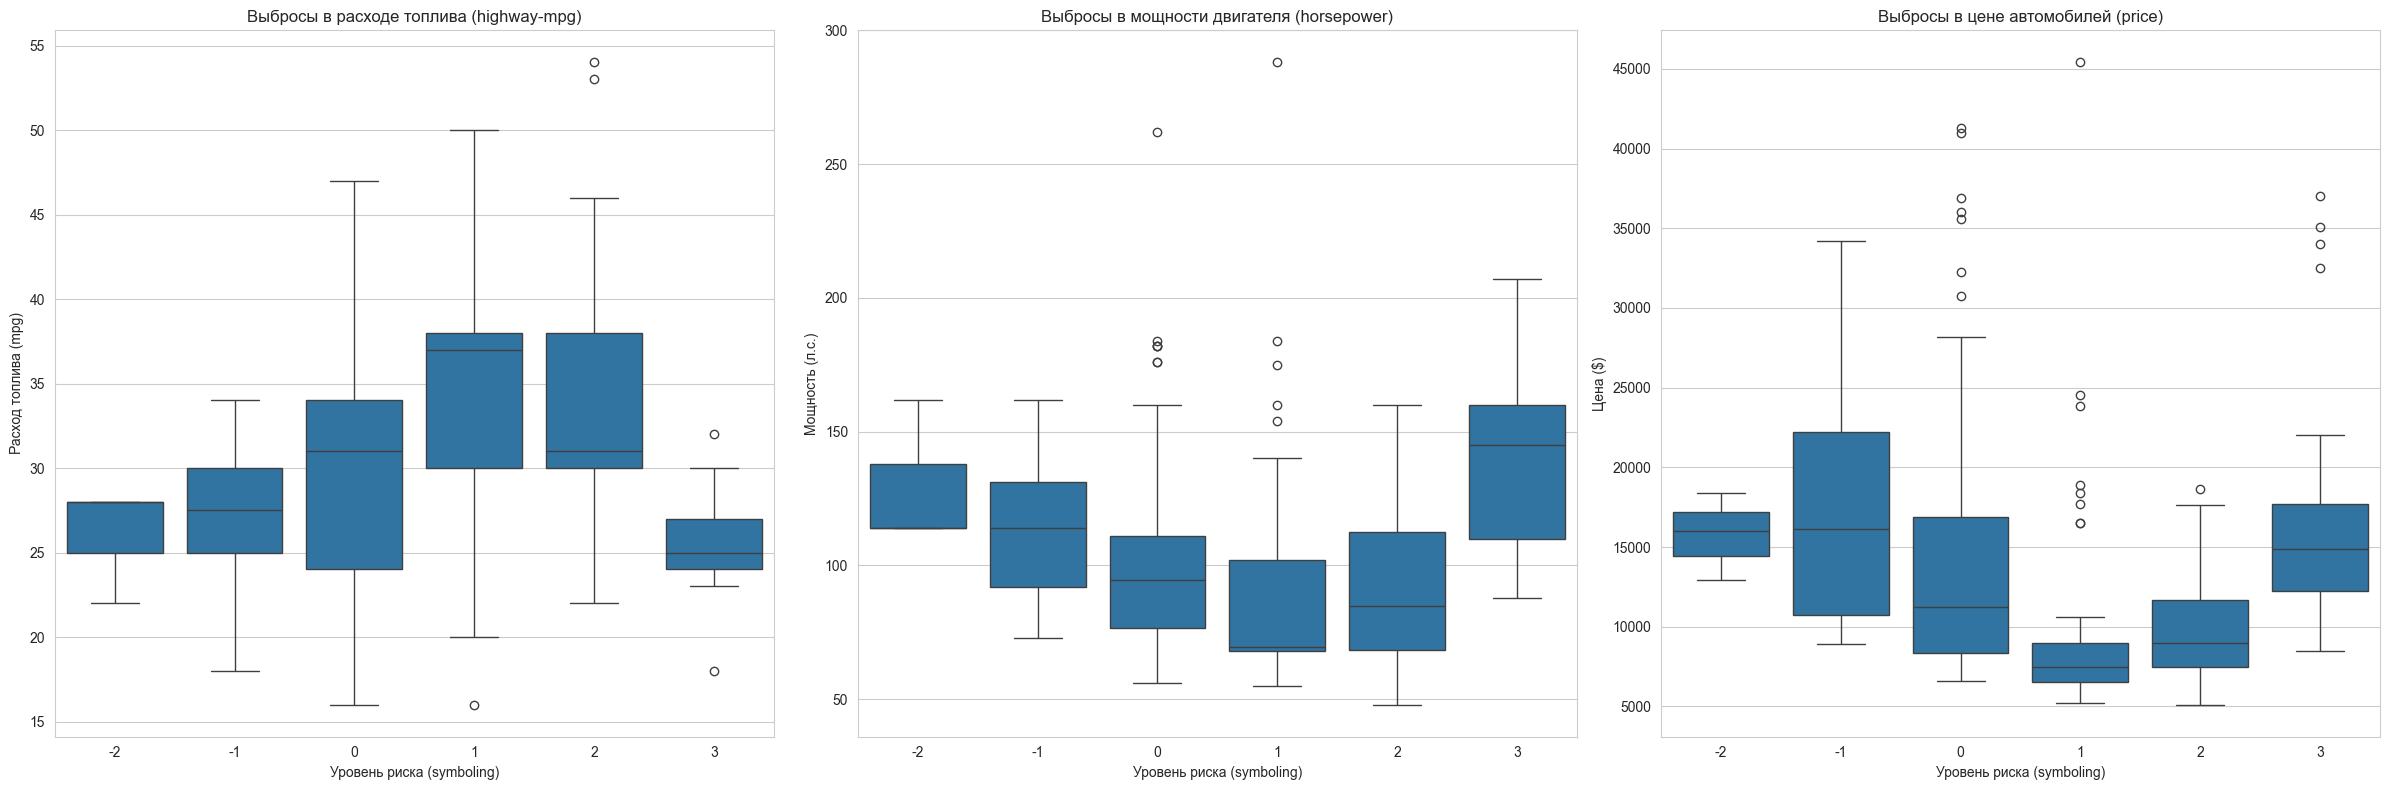

In [21]:
# Устанавливаем стиль
sns.set_style("whitegrid")

# Фигуры с графиками
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Boxplot для highway-mpg
sns.boxplot(x=df['symboling'], y=df['highway-mpg'], ax=axes[0])
axes[0].set_title('Выбросы в расходе топлива (highway-mpg)')
axes[0].set_xlabel('Уровень риска (symboling)')
axes[0].set_ylabel('Расход топлива (mpg)')

# Boxplot для horsepower
sns.boxplot(x=df['symboling'], y=df['horsepower'], ax=axes[1])
axes[1].set_title('Выбросы в мощности двигателя (horsepower)')
axes[1].set_xlabel('Уровень риска (symboling)')
axes[1].set_ylabel('Мощность (л.с.)')

# Boxplot для price
sns.boxplot(x=df['symboling'], y=df['price'], ax=axes[2])
axes[2].set_title('Выбросы в цене автомобилей (price)')
axes[2].set_xlabel('Уровень риска (symboling)')
axes[2].set_ylabel('Цена ($)')

# Отображаем графики
plt.tight_layout()
plt.show()

# Анализ важности признаков

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,  LabelEncoder
from sklearn.linear_model import LogisticRegression

In [23]:
# Выделяем признаки и целевую переменную
X = df.drop(columns=['symboling'])  # Признаки (убираем уровень риска, если он целевой)
y = df['symboling']  # Целевая переменная (уровень риска)

In [24]:
# Обрабатываем категориальные признаки
categorical_cols = X.select_dtypes(include=['object']).columns  # Выбираем категориальные столбцы
X = X.copy()  # Создаём копию, чтобы избежать предупреждений

In [25]:
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])  # Кодируем категории числами

In [26]:
# Заполняем пропуски медианой (если вдруг остались)
X.fillna(X.median(numeric_only=True), inplace=True)

In [27]:
# 1. Важность признаков с помощью случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances_rf = rf.feature_importances_

In [28]:
# 2. Важность признаков с помощью логистической регрессии (если классы сбалансированы)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_scaled, y)
feature_importances_lr = np.abs(log_reg.coef_).mean(axis=0)

In [30]:
# Объединяем результаты
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': feature_importances_rf,
    'LogisticRegression': feature_importances_lr
}).sort_values(by='RandomForest', ascending=False)

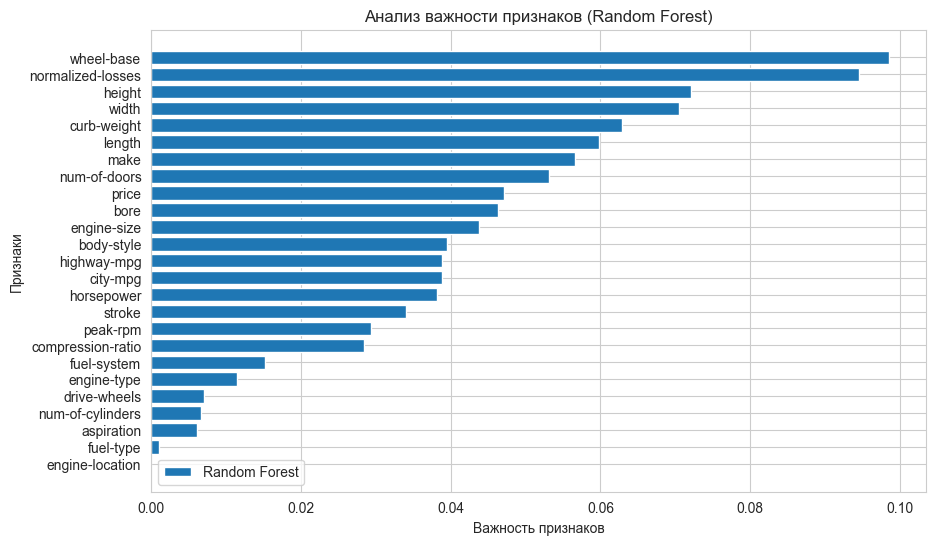

In [31]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['RandomForest'], label='Random Forest')
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.title("Анализ важности признаков (Random Forest)")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [32]:
print("Топ-5 наиболее значимых признаков (Random Forest):")
print(feature_importance_df.head())

Топ-5 наиболее значимых признаков (Random Forest):
              Feature  RandomForest  LogisticRegression
16         wheel-base      0.098569            0.738433
24  normalized-losses      0.094516            0.734644
13             height      0.072107            0.343046
14              width      0.070522            0.435391
12        curb-weight      0.062868            0.474323


In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [38]:
# Разделение данных
X = df.drop(columns=['symboling'])  # Убираем целевую переменную
y = df['symboling']

In [43]:
# Заполняем пропуски медианными значениями в числовых колонках
X = X.fillna(X.median())

# Если остались категориальные пропуски, заполняем их самым частым значением
X = X.fillna(X.mode().iloc[0])

In [44]:
# Выбираем категориальные столбцы
categorical_cols = X.select_dtypes(include=['object']).columns

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Обучение моделей
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)}

In [47]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'\n{name} Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8049
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.71      1.00      0.83         5
           0       0.93      0.72      0.81        18
           1       0.70      0.88      0.78         8
           2       0.75      0.60      0.67         5
           3       0.80      1.00      0.89         4

    accuracy                           0.80        41
   macro avg       0.82      0.87      0.83        41
weighted avg       0.83      0.80      0.80        41


Gradient Boosting Accuracy: 0.8293
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.71      1.00      0.83         5
           0       0.93      0.72      0.81        18
           1       0.70      0.88      0.78         8
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         4

    accur

In [48]:
# Вывод результатов
print("\nСравнение моделей по точности:")
for model, acc in results.items():
    print(f'{model}: {acc:.4f}')


Сравнение моделей по точности:
Random Forest: 0.8049
Gradient Boosting: 0.8293
SVM: 0.6585


Gradient Boosting показал наивысшую точность (82.93%) и хорошие значения precision, recall и f1-score. Особенно хорошо классифицирует классы -2, 3 и 2.

Random Forest немного уступает (80.49%), но также показывает стабильные результаты. В классе 2 точность ниже, чем у Gradient Boosting.

SVM показал худшие результаты (65.85%). У него проблемы с классификацией редких классов, особенно -2 и 1.

📌 Вывод: Gradient Boosting лучше всех справился с задачей, за ним идет Random Forest. SVM уступает по всем метрикам и не подходит для данной задачи. 

# Кластеризация по методу K-means clustering  с подбором гиперпараметров

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
# Проверяем и заполняем пропущенные значения медианными значениями
features = ['wheel-base', 'curb-weight', 'engine-size', 'horsepower', 'width', 'length', 'height']
df[features] = df[features].fillna(df[features].median())

In [56]:
# Выбираем числовые признаки для кластеризации
X = df[features]

In [57]:
# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Определение оптимального количества кластеров методом локтя
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

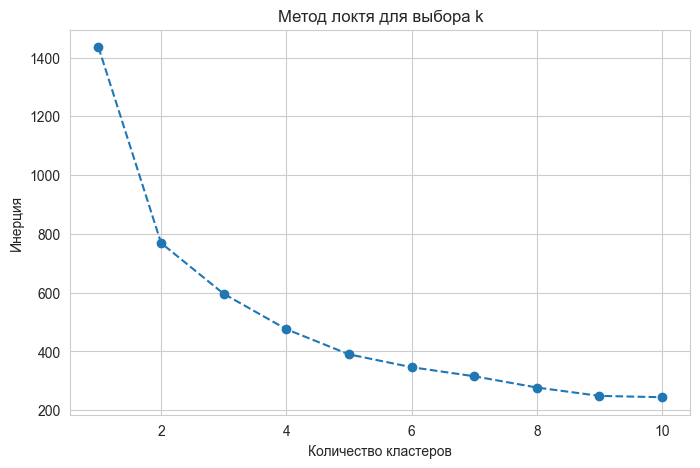

In [59]:
# График метода локтя
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для выбора k')
plt.show()

In [64]:
# Выбираем оптимальное количество кластеров
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

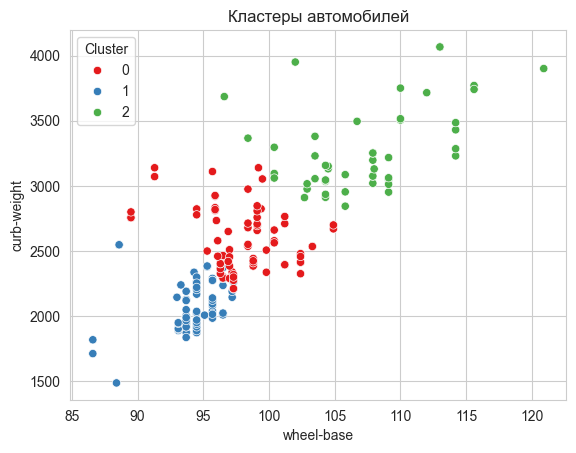

In [65]:
# Визуализация кластеров
sns.scatterplot(x=df['wheel-base'], y=df['curb-weight'], hue=df['Cluster'], palette='Set1')
plt.title('Кластеры автомобилей')
plt.show()

In [66]:
# Анализ средних значений по кластерам
cluster_means = df.groupby('Cluster')[features].mean()
print(cluster_means)

         wheel-base  curb-weight  engine-size  horsepower      width  \
Cluster                                                                
0         97.922785  2576.303797   128.683544  110.860759  65.927848   
1         94.224675  2075.428571    95.883117   74.363636  64.020779   
2        107.222449  3276.632653   172.795918  140.204082  68.840816   

             length     height  
Cluster                         
0        175.360759  53.526582  
1        162.335065  52.801299  
2        190.342857  55.495918  


In [68]:
# Краткий вывод по кластерам
for cluster_id, row in cluster_means.iterrows():
    print(f"Кластер {cluster_id}: Автомобили с средней колесной базой {row['wheel-base']:.2f}, средним весом {row['curb-weight']:.2f}, средним размером двигателя {row['engine-size']:.2f}, средней мощностью {row['horsepower']:.2f}, средней шириной {row['width']:.2f}, средней длиной {row['length']:.2f} и средней высотой {row['height']:.2f}.")

Кластер 0: Автомобили с средней колесной базой 97.92, средним весом 2576.30, средним размером двигателя 128.68, средней мощностью 110.86, средней шириной 65.93, средней длиной 175.36 и средней высотой 53.53.
Кластер 1: Автомобили с средней колесной базой 94.22, средним весом 2075.43, средним размером двигателя 95.88, средней мощностью 74.36, средней шириной 64.02, средней длиной 162.34 и средней высотой 52.80.
Кластер 2: Автомобили с средней колесной базой 107.22, средним весом 3276.63, средним размером двигателя 172.80, средней мощностью 140.20, средней шириной 68.84, средней длиной 190.34 и средней высотой 55.50.


Кластер 0 представляет собой автомобили со средними характеристиками, имеющими умеренную колесную базу, вес, размер двигателя и мощность. Это сбалансированные автомобили, вероятно, среднего класса.

Кластер 1 включает автомобили с наименьшими размерами и мощностью, что указывает на компактные или экономичные модели с меньшим двигателем и весом.

Кластер 2 состоит из автомобилей с наибольшими характеристиками, включая увеличенную колесную базу, вес, мощность и размеры. Этот кластер может включать более крупные или премиальные автомобили.

Таким образом, кластеризация помогла выявить три основные группы автомобилей, различающиеся по размерам и мощности, что может быть полезно для маркетинга, сегментации рынка или ценообразования.

# Сохранение моделей

In [ ]:
import joblib

**модели кластеризации и стандартизатора**

In [ ]:
# Проверяем и заполняем пропущенные значения медианными значениями
features = ['wheel-base', 'curb-weight', 'engine-size', 'horsepower', 'width', 'length', 'height']
df[features] = df[features].fillna(df[features].median())

# Выбираем числовые признаки для кластеризации
X = df[features]

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Сохранение модели кластеризации и стандартизатора
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
# Анализ средних значений по кластерам
cluster_means = df.groupby('Cluster')[features].mean()
print(cluster_means)

**модели классификации**

In [ ]:
# Кодирование категориальных переменных
categorical_features = ['make', 'fuel-type', 'aspiration', 'body-style']
for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col])

# Определение целевой переменной и признаков
X_classification = df.drop(columns=['risk'])
y_classification = df['risk']
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# Сохранение модели классификации
joblib.dump(rf, 'random_forest_model.pkl')

**Определение факторов риска**

In [ ]:
# Определение факторов риска
feature_importances = pd.DataFrame({'Feature': X_classification.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Топ-5 наиболее значимых признаков:")
print(feature_importances.head(5))

In [ ]:
# Сохранение данных предобработки
joblib.dump(X_classification.columns, 'classification_features.pkl')